<a href="https://colab.research.google.com/github/vvrgit/Aquaculture/blob/main/Aquaculture_DNN_Spec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import keras  #Keras is the deep learning library that helps you to code Deep Neural Networks with fewer lines of code
#from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop,Adadelta,SGD,Adagrad,Adam,Adamax,Nadam
#import pylab as plt
#import seaborn as sns #For data visualization
import pandas as pd # For Data manipulation

from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

In [ ]:
dataframe = pd.read_excel("/content/drive/MyDrive/AI Data/WQD.xlsx")
dataframe.head()

,Temp,Turbidity (cm),DO(mg/L),BOD (mg/L),CO2,pH`,Alkalinity (mg L-1 ),Hardness (mg L-1 ),Calcium (mg L-1 ),Ammonia (mg L-1 ),Nitrite (mg L-1 ),Phosphorus (mg L-1 ),H2S (mg L-1 ),Plankton (No. L-1),Water Quality
0,67.448725,10.127148,0.208153,7.473607,10.181084,4.751657,218.364855,300.125080,337.178226,0.286054,4.355310,0.005984,0.066793,6069.624017,2
1,64.626666,94.015595,11.434463,10.859998,14.860521,3.085154,273.939692,8.426776,363.660740,0.096040,2.182753,0.004906,0.023428,250.995959,2
2,65.121842,90.653462,12.430865,12.809970,12.319980,9.648515,220.812730,11.726274,309.370934,0.974501,4.901760,0.006979,0.065041,7218.927473,2
3,1.640334,0.066344,10.963529,8.508023,12.955209,4.819988,266.571628,6.627655,8.180468,0.884865,3.571842,3.174473,0.026018,1230.062252,2
4,64.863434,2.119173,1.361736,13.335372,13.603197,10.244034,252.108000,339.891514,253.996871,0.801695,4.655898,3.854701,0.060995,1035.054820,2


In [ ]:
dataset = dataframe.values
X = dataset[0:,0:14].astype(float)
Y = dataset[0:,14]
print(X[0:])

[[6.74487248e+01 1.01271479e+01 2.08152598e-01 ... 5.98351962e-03
  6.67928501e-02 6.06962402e+03]
 [6.46266660e+01 9.40155952e+01 1.14344627e+01 ... 4.90608990e-03
  2.34279599e-02 2.50995959e+02]
 [6.51218418e+01 9.06534623e+01 1.24308647e+01 ... 6.97923428e-03
  6.50410879e-02 7.21892747e+03]
 ...
 [2.69684218e+01 4.48454162e+01 4.30993492e+00 ... 7.26881067e-01
  1.91076819e-02 3.81644394e+03]
 [2.45230924e+01 5.71285964e+01 4.74361524e+00 ... 8.27799313e-01
  1.99046121e-02 3.58098936e+03]
 [2.44348471e+01 7.62218150e+01 4.42584598e+00 ... 8.91224283e-01
  1.92648940e-02 3.58423414e+03]]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
red_wine_data_X=ms.fit_transform(X)
print(red_wine_data_X)

[[8.00103481e-01 1.01013495e-01 5.00293726e-03 ... 1.17706829e-03
  6.73171576e-01 8.11592091e-01]
 [7.66530514e-01 9.42031465e-01 7.61686887e-01 ... 9.60470269e-04
  2.36103276e-01 2.33536461e-02]
 [7.72421433e-01 9.08324628e-01 8.28847103e-01 ... 1.37723896e-03
  6.55515824e-01 9.67286038e-01]
 ...
 [3.18524623e-01 4.49079152e-01 2.81474265e-01 ... 1.46100657e-01
  1.92559835e-01 5.06358084e-01]
 [2.89433464e-01 5.72223347e-01 3.10705502e-01 ... 1.66388470e-01
  2.00591975e-01 4.74461501e-01]
 [2.88383642e-01 7.63641122e-01 2.89286987e-01 ... 1.79138928e-01
  1.94144352e-01 4.74901065e-01]]


In [ ]:
import tensorflow as tf

y_train=tf.keras.utils.to_categorical(Y,num_classes=3)
print(y_train)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(red_wine_data_X, y_train, test_size=0.2, random_state=0)
print(y_test[0:5])
print(X_train)

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]
[[0.2044021  0.26358571 0.43766108 ... 0.00330223 0.04803045 0.31729808]
 [0.34229111 0.7621125  0.3213162  ... 0.25645242 0.19759969 0.56837745]
 [0.3356133  0.76146109 0.31421385 ... 0.32840851 0.19335239 0.59658362]
 ...
 [0.20805306 0.21369613 0.39011617 ... 0.00203244 0.09546591 0.74670141]
 [0.36677145 0.19525777 0.40169463 ... 0.00310678 0.14618867 0.35729484]
 [0.2011342  0.21316476 0.42516004 ... 0.00584566 0.14488687 0.64848288]]


In [ ]:
First_Layer_Size =17 # Number of neurons in first layer
model=Sequential()
model.add(Dense(First_Layer_Size,activation='relu', input_shape=(14,)))
model.add(Dense(17,activation='relu'))
model.add(Dense(17,activation='relu'))
model.add(Dense(17,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 17)                  │             255 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 17)                  │             306 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 17)                  │             306 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 17)                  │             306 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 3)                   │              54 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,227 (4.79 KB)

 Trainable params: 1,227 (4.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Epoch 1/100
387/387 - 8s - 20ms/step - accuracy: 0.6986 - loss: 0.7240 - val_accuracy: 0.8198 - val_loss: 0.4451
Epoch 2/100
387/387 - 2s - 4ms/step - accuracy: 0.8463 - loss: 0.3900 - val_accuracy: 0.8663 - val_loss: 0.3366
Epoch 3/100
387/387 - 1s - 2ms/step - accuracy: 0.8727 - loss: 0.3299 - val_accuracy: 0.8488 - val_loss: 0.3468
Epoch 4/100
387/387 - 1s - 2ms/step - accuracy: 0.8815 - loss: 0.3117 - val_accuracy: 0.9157 - val_loss: 0.2677
Epoch 5/100
387/387 - 1s - 3ms/step - accuracy: 0.8879 - loss: 0.2915 - val_accuracy: 0.9157 - val_loss: 0.2636
Epoch 6/100
387/387 - 1s - 3ms/step - accuracy: 0.8886 - loss: 0.2811 - val_accuracy: 0.8808 - val_loss: 0.2795
Epoch 7/100
387/387 - 1s - 3ms/step - accuracy: 0.8966 - loss: 0.2625 - val_accuracy: 0.9244 - val_loss: 0.2431
Epoch 8/100
387/387 - 1s - 2ms/step - accuracy: 0.9008 - loss: 0.2560 - val_accuracy: 0.9186 - val_loss: 0.2254
Epoch 9/100
387/387 - 1s - 4ms/step - accuracy: 0.9131 - loss: 0.2443 - val_accuracy: 0.9186 - val_loss

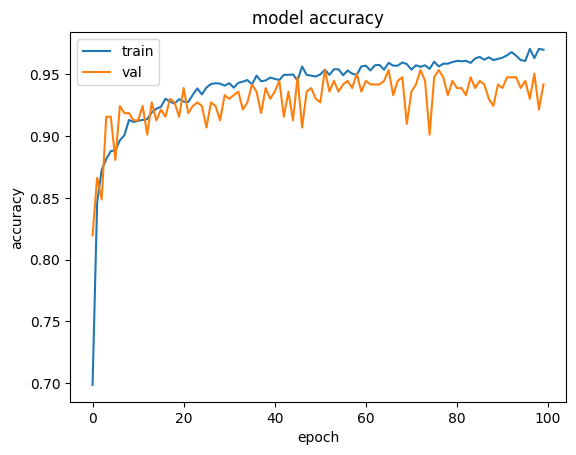

In [ ]:
import keras
from matplotlib import pyplot as plt
history = model.fit(X_train,y_train,validation_split = 0.1,batch_size=8,epochs=100,verbose=2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# Write the testing input and output variables
score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9385 - loss: 0.1844
Test loss: 0.17776402831077576
Test accuracy: 0.9337209463119507


In [ ]:
# Write the index of the test sample to test
prediction = model.predict(X_test[35].reshape(1,14))
print(prediction[0])
print(np.round(prediction[0]))
print(y_test[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[2.4712629e-15 9.8236692e-01 1.7633095e-02]
[0. 1. 0.]
[0. 1. 0.]


In [ ]:
# Write the index of the test sample to test
prediction = model.predict(X_test)
print(prediction)
print(np.round(prediction))
print(y_test)
y_pred=np.round(prediction)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[[1.71980631e-18 2.06426457e-01 7.93573558e-01]
 [1.69445786e-15 9.70172882e-01 2.98271086e-02]
 [9.19180747e-13 9.45978045e-01 5.40219732e-02]
 ...
 [2.63489285e-19 9.96313393e-01 3.68662155e-03]
 [1.74804046e-18 8.22447717e-01 1.77552253e-01]
 [6.54624278e-16 9.89633203e-01 1.03668505e-02]]
[[0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


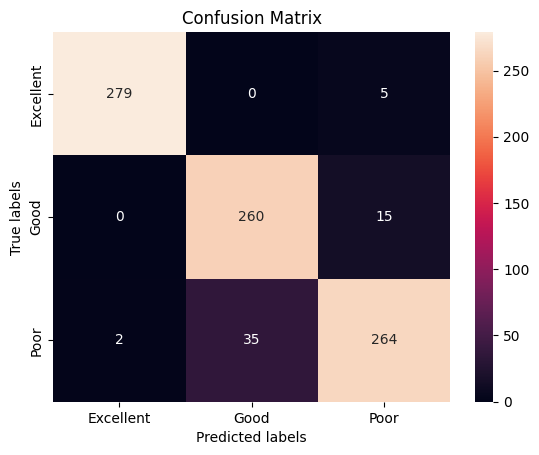

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

T5_lables = ['Excellent','Good','Poor']

ax= plt.subplot()

cm = confusion_matrix(np.asarray(y_test).argmax(axis=1), np.asarray(y_pred).argmax(axis=1))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(T5_lables); ax.yaxis.set_ticklabels(T5_lables);

In [ ]:
# Write the index of the test sample to test
prediction = model.predict(X_train)
print(prediction)
print(np.round(prediction))
print(y_train)
y_pred_train=np.round(prediction)

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
[[1.6630656e-18 9.9408674e-01 5.9131025e-03]
 [9.7001994e-01 3.6288779e-16 2.9980086e-02]
 [9.9934596e-01 2.7979022e-18 6.5403490e-04]
 ...
 [3.2133026e-13 9.8204243e-01 1.7957563e-02]
 [5.4090054e-15 9.9424571e-01 5.7543432e-03]
 [1.0271256e-15 9.3440264e-01 6.5597326e-02]]
[[0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
[[0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


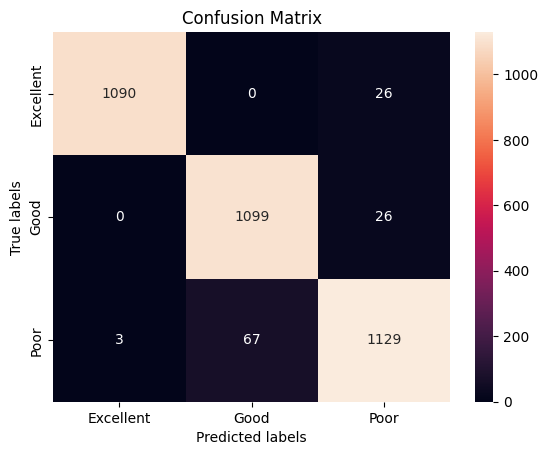

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

T5_lables = ['Excellent','Good','Poor']

ax= plt.subplot()

cm = confusion_matrix(np.asarray(y_train).argmax(axis=1), np.asarray(y_pred_train).argmax(axis=1))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(T5_lables); ax.yaxis.set_ticklabels(T5_lables);

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1116
           1       0.94      0.98      0.96      1125
           2       0.96      0.94      0.95      1199

   micro avg       0.96      0.96      0.96      3440
   macro avg       0.97      0.97      0.97      3440
weighted avg       0.96      0.96      0.96      3440
 samples avg       0.96      0.96      0.96      3440



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       284
           1       0.88      0.95      0.91       275
           2       0.93      0.88      0.90       301

   micro avg       0.93      0.93      0.93       860
   macro avg       0.93      0.93      0.93       860
weighted avg       0.94      0.93      0.93       860
 samples avg       0.93      0.93      0.93       860



# **Decision Tree Classifier**

In [80]:
dataframe = pd.read_excel("/content/drive/MyDrive/AI Data/WQD.xlsx")
dataframe.head()

,Unnamed: 0,ph,temperature,turbidity,fish
0,0,7.0,5.0,5.0,0
1,1,7.1,10.0,6.0,0
2,2,7.2,15.0,7.0,0
3,3,7.3,20.0,8.0,0
4,4,7.5,25.0,9.0,0


In [ ]:
dataset = dataframe.values
X = dataset[0:,0:14].astype(float)
Y = dataset[0:,14]
print(X[0:])

[[6.74487248e+01 1.01271479e+01 2.08152598e-01 ... 5.98351962e-03
  6.67928501e-02 6.06962402e+03]
 [6.46266660e+01 9.40155952e+01 1.14344627e+01 ... 4.90608990e-03
  2.34279599e-02 2.50995959e+02]
 [6.51218418e+01 9.06534623e+01 1.24308647e+01 ... 6.97923428e-03
  6.50410879e-02 7.21892747e+03]
 ...
 [2.69684218e+01 4.48454162e+01 4.30993492e+00 ... 7.26881067e-01
  1.91076819e-02 3.81644394e+03]
 [2.45230924e+01 5.71285964e+01 4.74361524e+00 ... 8.27799313e-01
  1.99046121e-02 3.58098936e+03]
 [2.44348471e+01 7.62218150e+01 4.42584598e+00 ... 8.91224283e-01
  1.92648940e-02 3.58423414e+03]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(y_test[0:5])
print(X_train)

[1. 1. 1. 0. 2.]
[[1.73755704e+01 2.63431284e+01 6.62715284e+00 ... 1.65547545e-02
  4.76781622e-03 2.42083851e+03]
 [2.89661728e+01 7.60693402e+01 4.90103767e+00 ... 1.27580700e+00
  1.96077244e-02 4.27425925e+03]
 [2.84048525e+01 7.60043648e+01 4.79566578e+00 ... 1.63374021e+00
  1.91863177e-02 4.48247188e+03]
 ...
 [1.76824611e+01 2.13668260e+01 5.92176734e+00 ... 1.02384052e-02
  9.47425029e-03 5.59061320e+03]
 [3.10239282e+01 1.95276675e+01 6.09354760e+00 ... 1.55825623e-02
  1.45068442e-02 2.71608710e+03]
 [1.71008791e+01 2.13138237e+01 6.44168496e+00 ... 2.92066316e-02
  1.43776820e-02 4.86558247e+03]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9965116279069768


In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train, y_pred_train))

Accuracy: 1.0


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9965116279069768


In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train, y_pred_train))

Accuracy: 1.0


# **SVC**

In [ ]:
# importing necessary libraries
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


# training a linear SVM classifier
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)

# model accuracy for X_test
accuracy = svm_model_linear.score(X_test, y_test)

# creating a confusion matrix
cm = confusion_matrix(y_test, svm_predictions)

In [ ]:
# model accuracy for X_test
train_accuracy = svm_model_linear.score(X_test, y_test)
test_accuracy = svm_model_linear.score(X_train, y_train)


# Model Accuracy, how often is the classifier correct?
print("train_accuracy:",train_accuracy)
print("test_accuracy:",test_accuracy)

train_accuracy: 0.7953488372093023
test_accuracy: 0.8061046511627907


In [ ]:
# creating a confusion matrix
cm = confusion_matrix(y_test, svm_predictions)
print(cm)

[[280   0   4]
 [  0 228  47]
 [ 42  83 176]]


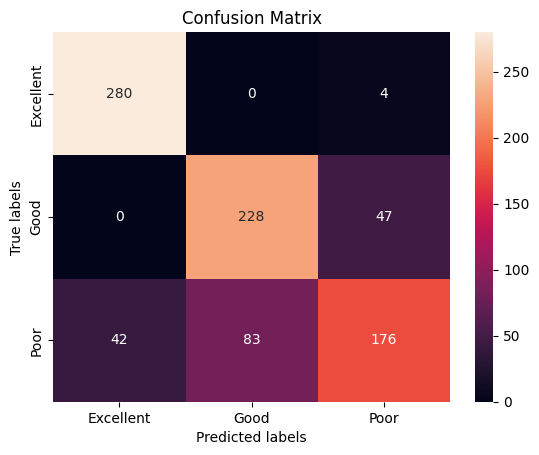

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

T5_lables = ['Excellent','Good','Poor']

ax= plt.subplot()

cm = confusion_matrix(y_test, svm_predictions)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(T5_lables); ax.yaxis.set_ticklabels(T5_lables);

In [ ]:
svm_predictions = svm_model_linear.predict(X_test)
svm_predictions_train = svm_model_linear.predict(X_train)



from sklearn.metrics import classification_report
print(classification_report(y_train, svm_predictions_train))

from sklearn.metrics import classification_report
print(classification_report(y_test, svm_predictions))

              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92      1116
         1.0       0.75      0.86      0.80      1125
         2.0       0.81      0.58      0.68      1199

    accuracy                           0.81      3440
   macro avg       0.81      0.81      0.80      3440
weighted avg       0.81      0.81      0.80      3440

              precision    recall  f1-score   support

         0.0       0.87      0.99      0.92       284
         1.0       0.73      0.83      0.78       275
         2.0       0.78      0.58      0.67       301

    accuracy                           0.80       860
   macro avg       0.79      0.80      0.79       860
weighted avg       0.79      0.80      0.79       860



# **KNN**

In [ ]:
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)

KNN_predictions_test = knn.predict(X_test)
KNN_predictions_train = knn.predict(X_train)

# accuracy on X_test
accuracy = knn.score(X_test, y_test)

# creating a confusion matrix
knn_predictions = knn.predict(X_test)
cm = confusion_matrix(y_test, knn_predictions)

In [ ]:
# model accuracy for X_test
train_accuracy = knn.score(X_test, y_test)
test_accuracy = knn.score(X_train, y_train)


# Model Accuracy, how often is the classifier correct?
print("train_accuracy:",train_accuracy)
print("test_accuracy:",test_accuracy)

train_accuracy: 0.7488372093023256
test_accuracy: 0.7997093023255814


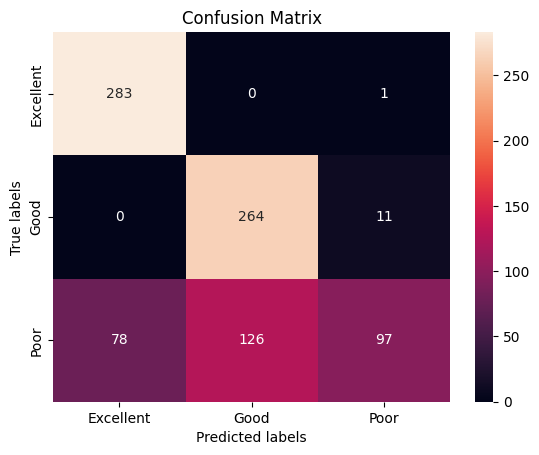

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

T5_lables = ['Excellent','Good','Poor']

ax= plt.subplot()

cm = confusion_matrix(y_test, KNN_predictions_test)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(T5_lables); ax.yaxis.set_ticklabels(T5_lables);

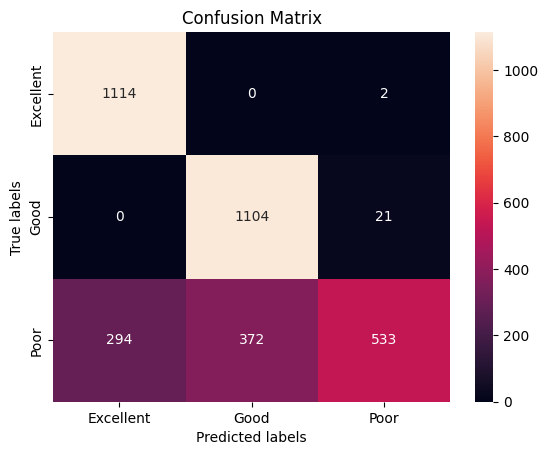

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

T5_lables = ['Excellent','Good','Poor']

ax= plt.subplot()

cm = confusion_matrix(y_train, KNN_predictions_train)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(T5_lables); ax.yaxis.set_ticklabels(T5_lables);

In [ ]:
knn_predictions = knn.predict(X_test)
knn_predictions_train = knn.predict(X_train)



from sklearn.metrics import classification_report
print(classification_report(y_train, knn_predictions_train))

from sklearn.metrics import classification_report
print(classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88      1116
         1.0       0.75      0.98      0.85      1125
         2.0       0.96      0.44      0.61      1199

    accuracy                           0.80      3440
   macro avg       0.83      0.81      0.78      3440
weighted avg       0.84      0.80      0.78      3440

              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88       284
         1.0       0.68      0.96      0.79       275
         2.0       0.89      0.32      0.47       301

    accuracy                           0.75       860
   macro avg       0.78      0.76      0.71       860
weighted avg       0.79      0.75      0.71       860



# **Naive**

In [ ]:
# training a KNN classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)

gnb_predictions_test = gnb.predict(X_test)
gnb_predictions_train = gnb.predict(X_train)


In [ ]:
# model accuracy for X_test
train_accuracy = gnb.score(X_test, y_test)
test_accuracy = gnb.score(X_train, y_train)


# Model Accuracy, how often is the classifier correct?
print("train_accuracy:",train_accuracy)
print("test_accuracy:",test_accuracy)

train_accuracy: 0.877906976744186
test_accuracy: 0.8906976744186047


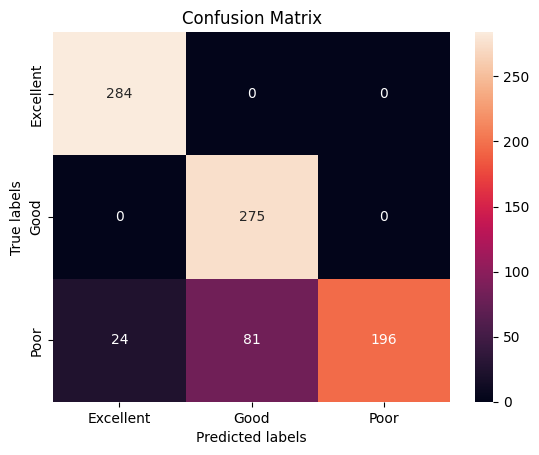

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

T5_lables = ['Excellent','Good','Poor']

ax= plt.subplot()

cm = confusion_matrix(y_test, gnb_predictions_test)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(T5_lables); ax.yaxis.set_ticklabels(T5_lables);

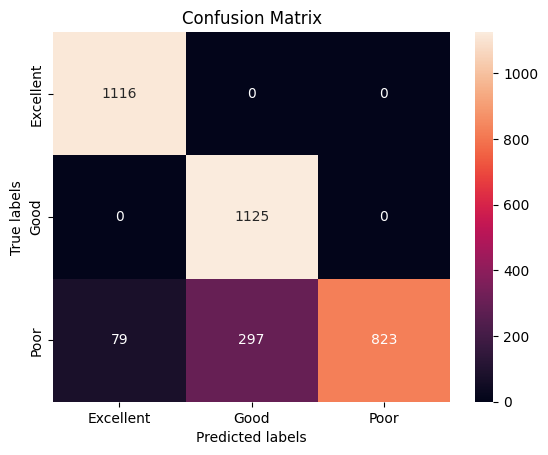

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

T5_lables = ['Excellent','Good','Poor']

ax= plt.subplot()

cm = confusion_matrix(y_train, gnb_predictions_train)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(T5_lables); ax.yaxis.set_ticklabels(T5_lables);

In [ ]:
gnb_predictions_test = gnb.predict(X_test)
gnb_predictions_train = gnb.predict(X_train)



from sklearn.metrics import classification_report
print(classification_report(y_train, gnb_predictions_train))

from sklearn.metrics import classification_report
print(classification_report(y_test, gnb_predictions_test))

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.97      1116
         1.0       0.79      1.00      0.88      1125
         2.0       1.00      0.69      0.81      1199

    accuracy                           0.89      3440
   macro avg       0.91      0.90      0.89      3440
weighted avg       0.91      0.89      0.89      3440

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96       284
         1.0       0.77      1.00      0.87       275
         2.0       1.00      0.65      0.79       301

    accuracy                           0.88       860
   macro avg       0.90      0.88      0.87       860
weighted avg       0.90      0.88      0.87       860



# **Load Model**

In [ ]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('aqua_dnn.h5')

# Show the model architecture
new_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 17)                  │             255 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 17)                  │             306 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 17)                  │             306 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 17)                  │             306 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │              54 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,229 (4.80 KB)

 Trainable params: 1,227 (4.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
# Write the index of the test sample to test
prediction = new_model.predict(X_test[35].reshape(1,14))
print(prediction[0])
print(np.round(prediction[0]))
print(y_test[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
[0. 0. 1.]
[0. 0. 1.]
1.0


In [ ]:
list_of_columns = ['Temp','Turbidity','DO','BOD','CO2','pH','Alkalinity','Hardness','Calcium','Ammonia','Nitrite','Phosphorus','H2S','Plankton']
input_data=pd.DataFrame(columns=list_of_columns)

input_data.at[0, 'Temp'] = (float(input('enter Temp'))-0.194046)/(84.251522-0.194046)
input_data.at[0, 'Turbidity'] = (float(input('enter Turbidity'))-0.051424)/(99.797743-0.051424)
input_data.at[0, 'DO'] = (float(input('enter DO'))-0.133928)/(14.970122-0.133928)
input_data.at[0, 'BOD'] = (float(input('enter BOD'))-1.000621)/(14.943006-1.000621)
input_data.at[0, 'CO2'] = (float(input('enter CO2'))-0.001155)/(14.984216-0.001155)
input_data.at[0, 'pH'] = (float(input('enter pH'))-0.003944)/(14.851195-0.003944)
input_data.at[0, 'Alkalinity'] = (float(input('enter Alkalinity'))-25.012328)/(299.913160-25.012328)
input_data.at[0, 'Hardness'] = (float(input('enter Hardness'))-0.255805	)/(398.796550-0.255805)
input_data.at[0, 'Calcium'] = (float(input('enter Calcium'))-0.018293)/(399.321398-0.018293)
input_data.at[0, 'Ammonia'] = (float(input('enter Ammonia'))-0)/(0.999300)
input_data.at[0, 'Nitrite'] = (float(input('enter Nitrite'))-0)/(4.989535)
input_data.at[0, 'Phosphorus'] = (float(input('enter Phosphorus'))-0.000128)/(4.974457-0.000128)
input_data.at[0, 'H2S'] = (float(input('enter H2S'))-0)/0.099220
input_data.at[0, 'Plankton'] = (float(input('enter Plankton'))-78.603733)/(7460.415789-78.603733)


enter Temp67
enter Turbidity10
enter DO0.2
enter BOD7.4
enter CO210.18
enter pH4.7
enter Alkalinity218
enter Hardness300
enter Calcium337
enter Ammonia0.286
enter Nitrite4.355
enter Phosphorus0.006
enter H2S0.067
enter Plankton6070


In [ ]:
data=np.array(input_data[0:])
data

array([[0.7947651675860455, 0.09973877833025598, 0.004453433272711318,
        0.45898739706298464, 0.6793568417027736, 0.31629127843262034,
        0.702026511145663, 0.7521042672813791, 0.8439245845583896,
        0.2862003402381667, 0.872826826547965, 0.0011804607214359968,
        0.6752670832493449, 0.8116430249846502]], dtype=object)

In [ ]:
y_tensor = tf.convert_to_tensor(data, dtype=tf.int64)
prediction = new_model.predict(y_tensor)
ind=np.argmax(prediction)
if(ind==0):
  print("Excellent")
if(ind==1):
  print("Good")
if(ind==2):
  print("Poor")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Poor


#DNN With Fish Sperc

In [5]:
dataframe = pd.read_excel("/content/drive/MyDrive/AQUACULTURE DATA/Aqua-Fish-Spec-Dataset-Post-Outlier.xlsx")
dataframe.head()

,Unnamed: 0,ph,temperature,turbidity,fish
0,0,7.0,5.0,5.0,0
1,1,7.1,10.0,6.0,0
2,2,7.2,15.0,7.0,0
3,3,7.3,20.0,8.0,0
4,4,7.5,25.0,9.0,0


In [6]:
dataset = dataframe.values
X = dataset[0:,1:4].astype(float)
Y = dataset[0:,4]
print(Y[0:])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]


In [7]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
red_wine_data_X=ms.fit_transform(X)
print(red_wine_data_X)

[[3.57142857e-01 3.22580645e-02 1.28113879e-01]
 [3.92857143e-01 1.93548387e-01 2.17081851e-01]
 [4.28571429e-01 3.54838710e-01 3.06049822e-01]
 [4.64285714e-01 5.16129032e-01 3.95017794e-01]
 [5.35714286e-01 6.77419355e-01 4.83985765e-01]
 [5.00000000e-01 7.09677419e-01 5.72953737e-01]
 [3.57142857e-01 7.74193548e-01 1.72597865e-01]
 [3.92857143e-01 8.38709677e-01 2.61565836e-01]
 [4.28571429e-01 2.58064516e-01 3.50533808e-01]
 [4.64285714e-01 2.90322581e-01 4.39501779e-01]
 [5.35714286e-01 3.22580645e-01 5.28469751e-01]
 [5.00000000e-01 4.51612903e-01 1.45907473e-01]
 [3.57142857e-01 5.80645161e-01 2.34875445e-01]
 [3.92857143e-01 8.70967742e-01 3.23843416e-01]
 [4.28571429e-01 4.83870968e-01 4.12811388e-01]
 [4.64285714e-01 9.67741935e-02 5.01779359e-01]
 [5.35714286e-01 1.29032258e-01 1.54804270e-01]
 [5.00000000e-01 1.61290323e-01 2.43772242e-01]
 [3.57142857e-01 2.25806452e-01 3.32740214e-01]
 [3.92857143e-01 3.87096774e-01 4.21708185e-01]
 [4.28571429e-01 4.19354839e-01 5.106761

In [8]:
import tensorflow as tf

y_train=tf.keras.utils.to_categorical(Y,num_classes=4)
print(y_train)

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(red_wine_data_X, y_train, test_size=0.2, random_state=0)

In [11]:
First_Layer_Size =18 # Number of neurons in first layer
model=Sequential()
model.add(Dense(First_Layer_Size,activation='relu', input_shape=(3,)))
model.add(Dense(First_Layer_Size,activation='relu'))
model.add(Dense(First_Layer_Size,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 18)                  │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 18)                  │             342 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 18)                  │             342 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │              76 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 832 (3.25 KB)

 Trainable params: 832 (3.25 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
CKPT_path = "Fish_Spech_64.weights.h5"
callbacks = tf.keras.callbacks.ModelCheckpoint(CKPT_path, save_best_only=True, save_weights_only=True)

In [45]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - accuracy: 0.9636 - loss: 0.0639 - val_accuracy: 1.0000 - val_loss: 0.0260
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9654 - loss: 0.0568 - val_accuracy: 1.0000 - val_loss: 0.0448
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9654 - loss: 0.0624 - val_accuracy: 1.0000 - val_loss: 0.0295
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9693 - loss: 0.0502 - val_accuracy: 1.0000 - val_loss: 0.0269
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9654 - loss: 0.0481 - val_accuracy: 1.0000 - val_loss: 0.0576
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9693 - loss: 0.0684 - val_accuracy: 1.0000 - val_loss: 0.0678
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9654 - loss: 0.0746 - val_accuracy: 1.0000 - val_loss: 0.0325
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9808 - loss: 0.0469 - val_accuracy: 1.0000 - val_loss

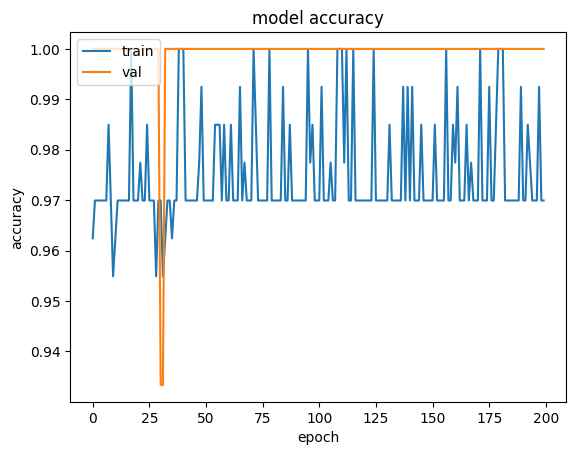

In [46]:
import keras
from matplotlib import pyplot as plt
history = model.fit(X_train,y_train,validation_split = 0.1,batch_size=64,epochs=200,verbose=1,callbacks=callbacks)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
model.save("Fish_Spech_32.h5")

In [47]:
print(max(history.history['accuracy']),max(history.history['val_accuracy']))

1.0 1.0


# **Load Model**

In [48]:
# Recreate the exact same model, including its weights and the optimizer
model = tf.keras.models.load_model("/content/Fish_Spech_64.h5")
model.load_weights("/content/Fish_Spech_64.weights.h5")

In [49]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 18)                  │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 18)                  │             342 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 18)                  │             342 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │              76 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 834 (3.26 KB)

 Trainable params: 832 (3.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [50]:
list_of_columns = ["ph",	"temperature",	"turbidity"	]
input_data=pd.DataFrame(columns=list_of_columns)

input_data.at[0, 'ph'] = (float(input('enter ph'))-6)/(8.8-6)
input_data.at[0, 'temperature'] = (float(input('enter temperature'))-4)/(35-4)
input_data.at[0, 'turbidity'] = (float(input('enter turbidity'))-3.56)/(14.8-3.56)

enter ph6
enter temperature27
enter turbidity10


In [51]:
data=np.array(input_data[0:])
data

array([[0.0, 0.7419354838709677, 0.5729537366548042]], dtype=object)

In [52]:
y_tensor = tf.convert_to_tensor(data, dtype=tf.int64)
prediction = model.predict(y_tensor)
ind=np.argmax(prediction)
if(ind==0):
  print("Karpio")
if(ind==1):
  print("Katla")
if(ind==2):
  print("Shrimp")
if(ind==3):
  print("Silver")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
Silver


In [189]:
dataframe.describe()

,Unnamed: 0,ph,temperature,turbidity,fish
count,186.000000,186.000000,186.000000,186.000000,186.000000
mean,97.392473,7.218817,21.780860,4.688548,1.629032
std,58.231613,0.620806,4.765763,2.252349,1.089019
min,0.000000,6.000000,4.000000,3.560000,0.000000
25%,46.250000,6.920000,21.120000,3.570000,1.000000
50%,92.500000,7.240000,21.190000,3.610000,2.000000
75%,148.750000,7.600000,21.440000,4.115000,3.000000
max,195.000000,8.800000,35.000000,14.800000,3.000000


In [213]:
va=[]
ta=[]
for i in [2,3,4,5,6,9,12,15,18]:
  First_Layer_Size =i # Number of neurons in first layer
  model=Sequential()
  model.add(Dense(First_Layer_Size,activation='swish', input_shape=(3,)))
  model.add(Dense(4,activation='softmax'))
  model.summary()
  CKPT_path = "Model_ckpt.weights.h5"
  callbacks = tf.keras.callbacks.ModelCheckpoint(CKPT_path, save_best_only=True, save_weights_only=True)
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  history = model.fit(X_train,y_train,validation_split = 0.1,batch_size=8,epochs=200,verbose=0,callbacks=callbacks)
  va.append(max(history.history['val_accuracy']))
  ta.append(max(history.history['accuracy']))
print("ta=",ta)
print("va=",va)

Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_129 (Dense)                    │ (None, 2)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_130 (Dense)                    │ (None, 4)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20 (80.00 B)

 Trainable params: 20 (80.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_131 (Dense)                    │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_132 (Dense)                    │ (None, 4)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28 (112.00 B)

 Trainable params: 28 (112.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_133 (Dense)                    │ (None, 4)                   │              16 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_134 (Dense)                    │ (None, 4)                   │              20 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36 (144.00 B)

 Trainable params: 36 (144.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_135 (Dense)                    │ (None, 5)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_136 (Dense)                    │ (None, 4)                   │              24 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44 (176.00 B)

 Trainable params: 44 (176.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_137 (Dense)                    │ (None, 6)                   │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_138 (Dense)                    │ (None, 4)                   │              28 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52 (208.00 B)

 Trainable params: 52 (208.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_139 (Dense)                    │ (None, 9)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_140 (Dense)                    │ (None, 4)                   │              40 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 76 (304.00 B)

 Trainable params: 76 (304.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_141 (Dense)                    │ (None, 12)                  │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_142 (Dense)                    │ (None, 4)                   │              52 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 100 (400.00 B)

 Trainable params: 100 (400.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_143 (Dense)                    │ (None, 15)                  │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_144 (Dense)                    │ (None, 4)                   │              64 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 124 (496.00 B)

 Trainable params: 124 (496.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_145 (Dense)                    │ (None, 18)                  │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_146 (Dense)                    │ (None, 4)                   │              76 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 148 (592.00 B)

 Trainable params: 148 (592.00 B)

 Non-trainable params: 0 (0.00 B)

ta= [0.5037593841552734, 0.6541353464126587, 0.6992481350898743, 0.7067669034004211, 0.6917293071746826, 0.6917293071746826, 0.6992481350898743, 0.6992481350898743, 0.6992481350898743]
va= [0.6666666865348816, 0.800000011920929, 0.8666666746139526, 0.800000011920929, 0.8666666746139526, 0.800000011920929, 0.800000011920929, 0.800000011920929, 0.800000011920929]


In [68]:
dataframe.describe()

,Unnamed: 0,ph,temperature,turbidity,fish
count,186.000000,186.000000,186.000000,186.000000,186.000000
mean,97.392473,7.218817,21.780860,4.688548,1.629032
std,58.231613,0.620806,4.765763,2.252349,1.089019
min,0.000000,6.000000,4.000000,3.560000,0.000000
25%,46.250000,6.920000,21.120000,3.570000,1.000000
50%,92.500000,7.240000,21.190000,3.610000,2.000000
75%,148.750000,7.600000,21.440000,4.115000,3.000000
max,195.000000,8.800000,35.000000,14.800000,3.000000


# **Decision Tree Classifier**

In [81]:
dataframe = pd.read_excel("/content/drive/MyDrive/AQUACULTURE DATA/Aqua-Fish-Spec-Dataset-Post-Outlier.xlsx")
dataframe.head()

,Unnamed: 0,ph,temperature,turbidity,fish
0,0,7.0,5.0,5.0,0
1,1,7.1,10.0,6.0,0
2,2,7.2,15.0,7.0,0
3,3,7.3,20.0,8.0,0
4,4,7.5,25.0,9.0,0


In [82]:
dataset = dataframe.values
X = dataset[0:,1:4].astype(float)
Y = dataset[0:,4]
print(Y[0:])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]


In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [84]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train, y_pred_train))

Accuracy: 0.9473684210526315
Accuracy: 1.0


# **Random Forest**

In [85]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = rf.predict(X_test)
y_pred_train = rf.predict(X_train)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train, y_pred_train))

Accuracy: 0.9736842105263158
Accuracy: 1.0


# **SVC**

In [86]:
# importing necessary libraries
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


# training a linear SVM classifier
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)

# model accuracy for X_test
accuracy = svm_model_linear.score(X_test, y_test)

# creating a confusion matrix
cm = confusion_matrix(y_test, svm_predictions)

# model accuracy for X_test
train_accuracy = svm_model_linear.score(X_test, y_test)
test_accuracy = svm_model_linear.score(X_train, y_train)


# Model Accuracy, how often is the classifier correct?
print("train_accuracy:",train_accuracy)
print("test_accuracy:",test_accuracy)

train_accuracy: 0.6578947368421053
test_accuracy: 0.6891891891891891


# **KNN**

In [89]:
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)

KNN_predictions_test = knn.predict(X_test)
KNN_predictions_train = knn.predict(X_train)

# accuracy on X_test
accuracy = knn.score(X_test, y_test)

# creating a confusion matrix
knn_predictions = knn.predict(X_test)
cm = confusion_matrix(y_test, knn_predictions)



from sklearn.metrics import classification_report
print(classification_report(y_train, KNN_predictions_train))

from sklearn.metrics import classification_report
print(classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

         0.0       0.86      0.89      0.88        28
         1.0       0.88      0.96      0.92        47
         2.0       0.74      0.81      0.78        32
         3.0       0.91      0.73      0.81        41

    accuracy                           0.85       148
   macro avg       0.85      0.85      0.85       148
weighted avg       0.86      0.85      0.85       148

              precision    recall  f1-score   support

         0.0       0.71      1.00      0.83         5
         1.0       0.75      0.82      0.78        11
         2.0       0.60      0.75      0.67         8
         3.0       0.89      0.57      0.70        14

    accuracy                           0.74        38
   macro avg       0.74      0.78      0.74        38
weighted avg       0.76      0.74      0.73        38



# **naive_bayes**

In [91]:
# training a naive_bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)

gnb_predictions_test = gnb.predict(X_test)
gnb_predictions_train = gnb.predict(X_train)

# model accuracy for X_test
train_accuracy = gnb.score(X_test, y_test)
test_accuracy = gnb.score(X_train, y_train)


# Model Accuracy, how often is the classifier correct?
print("train_accuracy:",train_accuracy)
print("test_accuracy:",test_accuracy)

train_accuracy: 0.6052631578947368
test_accuracy: 0.6891891891891891


In [53]:
print(tf.__version__)

2.17.1
